### 1. Import the required libraries

In [36]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Import the data

In [37]:
df = pd.read_excel("Sales.xlsx")


### 3. Check the data

In [38]:
df.head()

,Date,Region,Sales Rep,Customer,Product,COGS,Sales
0,2004-06-17,MidWest,Harry,ExcelIsVeryFun.com,MWN Item,6305.0008,9272.06
1,2004-06-17,East,Harry,Office Depot,MBP Item,5773.2000,8490.00
2,2004-06-17,South,Harry,ExcelIsVeryFun.com,KVM Item,8271.4896,9399.42
3,2004-06-17,West,Jon,Sherman Williams,UBU Item,4919.6028,7234.71
4,2004-06-17,North,Harry,Whole Foods,HES Item,5838.1500,7784.20


### 4. Get the descriptive statistics for the data

In [39]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
COGS,1999.0,3148.949353,2057.604330,7.4104,1456.42475,2963.2338,4456.441,9318.958
Sales,1999.0,5041.272721,2875.600841,12.5600,2557.62000,4976.4200,7526.840,9994.240


### 5. Check the basic info of the dataset

In [40]:
df.shape

(1999, 7)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1999 non-null   datetime64[ns]
 1   Region     1999 non-null   object        
 2   Sales Rep  1999 non-null   object        
 3   Customer   1999 non-null   object        
 4   Product    1999 non-null   object        
 5   COGS       1999 non-null   float64       
 6   Sales      1999 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 109.4+ KB


In [42]:
df.duplicated().sum()

0

###6. Find the total sales amount across each region

In [43]:
df.groupby('Region')['Sales'].sum()

Region
East       3426489.59
MidWest    1651501.56
North      1723421.38
South      1706418.14
West       1569673.50
Name: Sales, dtype: float64

###7. Find the total count of Sales and COGS across various regions

In [44]:
df.groupby('Region')['Sales','COGS'].count()

C:\Users\sai prathyusha\AppData\Local\Temp\ipykernel_6076\1528297011.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('Region')['Sales','COGS'].count()


,Sales,COGS
Region,,
East,688,688
MidWest,314,314
North,342,342
South,335,335
West,320,320


### 8. Find the Average Sales and Average COGS across various regions

In [45]:
df.groupby('Region')['Sales','COGS'].mean()

C:\Users\sai prathyusha\AppData\Local\Temp\ipykernel_6076\723704277.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('Region')['Sales','COGS'].mean()


,Sales,COGS
Region,,
East,4980.362776,3073.589504
MidWest,5259.559108,3390.568526
North,5039.243801,3109.908385
South,5093.785493,3116.845563
West,4905.229688,3149.217907


In [46]:
df.columns

Index(['Date', 'Region', 'Sales Rep', 'Customer', 'Product', 'COGS', 'Sales'], dtype='object')

### 9. Find the average sales across different regions for each sales representative

In [88]:
avg_sales = df.groupby(['Region','Sales Rep'])['Sales'].sum().unstack()
avg_sales

Sales Rep,Harry,James,Jon,Luke,Rhonda,Sherry,Steven,Tom
Region,,,,,,,,
East,486840.62,424234.18,334794.87,333815.59,402080.39,520169.79,500920.09,423634.06
MidWest,247987.69,207164.71,231778.99,199211.40,192855.38,185465.42,165974.78,221063.19
North,255416.43,220679.39,277404.03,208200.24,167137.03,156876.25,204597.69,233110.32
South,257832.05,169784.64,258672.84,231024.41,156087.13,169710.11,235576.52,227730.44
West,161464.09,290770.33,173559.67,210096.98,185281.95,188710.09,189088.14,170702.25


### 10. Plot the average sales across different regions for each sales representative

<AxesSubplot:xlabel='Region'>

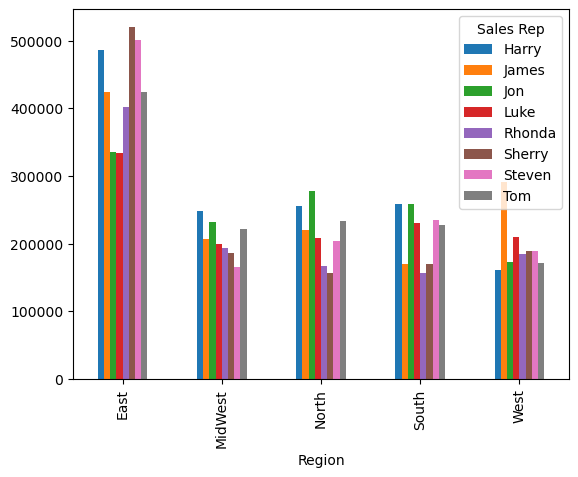

In [91]:
df.groupby(['Region','Sales Rep'])['Sales'].sum().unstack().plot(kind = 'bar')

### 11. Plot the total amount of sales for each sales representative

<AxesSubplot:xlabel='Sales Rep', ylabel='Sales'>

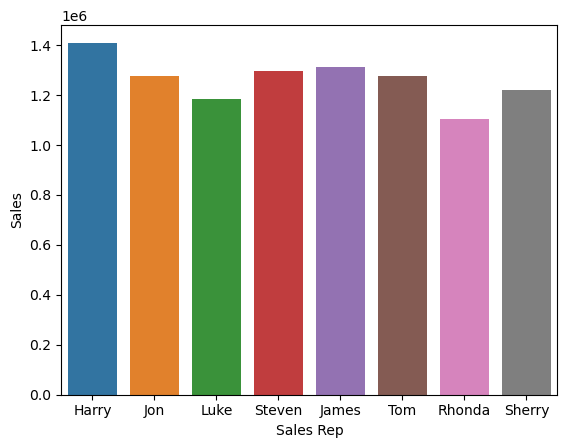

In [65]:
sns.barplot(data = df, y = 'Sales', x = 'Sales Rep', ci = False,estimator=sum)
#plt.bar_lable(ax.containers[0])

### 12. Plot the total sales across different regions

<AxesSubplot:xlabel='Region', ylabel='Sales'>

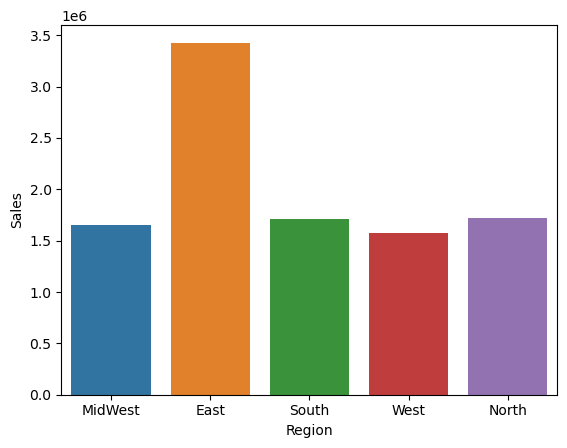

In [79]:
sns.barplot(data = df, y = 'Sales', x = 'Region', ci = False,estimator=sum)
#plt.bar_lable(ax.containers[0])

###13. Find the sum of sales for each sales representative

In [80]:
df.groupby('Sales Rep')['Sales'].sum()

Sales Rep
Harry     1409540.88
James     1312633.25
Jon       1276210.40
Luke      1182348.62
Rhonda    1103441.88
Sherry    1220931.66
Steven    1296157.22
Tom       1276240.26
Name: Sales, dtype: float64

### 14. Find the average sales for each sales representative

In [81]:
df.groupby('Sales Rep')['Sales'].mean()

Sales Rep
Harry     5088.595235
James     4879.677509
Jon       5084.503586
Luke      5074.457597
Rhonda    5015.644909
Sherry    5151.610380
Steven    5123.151067
Tom       4927.568571
Name: Sales, dtype: float64

In [82]:
df

,Date,Region,Sales Rep,Customer,Product,COGS,Sales
0,2004-06-17,MidWest,Harry,ExcelIsVeryFun.com,MWN Item,6305.0008,9272.06
1,2004-06-17,East,Harry,Office Depot,MBP Item,5773.2000,8490.00
2,2004-06-17,South,Harry,ExcelIsVeryFun.com,KVM Item,8271.4896,9399.42
3,2004-06-17,West,Jon,Sherman Williams,UBU Item,4919.6028,7234.71
4,2004-06-17,North,Harry,Whole Foods,HES Item,5838.1500,7784.20
...,...,...,...,...,...,...,...
1994,2006-06-14,East,Steven,Peet's Coffee,EJL Item,2315.4340,3405.05
1995,2006-06-15,North,Harry,Amazon.com,ZON Item,5406.2703,9163.17
1996,2006-06-15,East,Jon,Amazon.com,ZET Item,6971.4975,9295.33
1997,2006-06-15,North,Harry,Solar and Wind Inc.,JFA Item,736.2520,836.65


### 15. Find the total count of products sold by each sales person irrespective of the region

In [110]:
df.groupby('Sales Rep')['Product'].count().reset_index(name='TotalProductsSold')

,Sales Rep,TotalProductsSold
0,Harry,277
1,James,269
2,Jon,251
3,Luke,233
4,Rhonda,220
5,Sherry,237
6,Steven,253
7,Tom,259


### 16. Find the average sales across different regions for each sales representative

In [96]:
df.groupby(['Region','Sales Rep'])['Sales'].mean().unstack()

Sales Rep,Harry,James,Jon,Luke,Rhonda,Sherry,Steven,Tom
Region,,,,,,,,
East,5291.745870,4820.842955,4524.255000,4909.052794,5026.004875,5475.471474,4863.301845,4814.023409
MidWest,5060.973265,4603.660222,5794.474750,6036.709091,4821.384500,5299.012000,4881.611176,5817.452368
North,5321.175625,4503.661020,5234.038302,4957.148571,4915.795000,4614.007353,5683.269167,5067.615652
South,5055.530392,5476.923871,5503.677447,5133.875778,5035.068710,4714.169722,5121.228696,4744.384167
West,4363.894324,5192.327321,4690.801892,4668.821778,5293.770000,5100.272703,5561.415882,4376.980769


### 17.  Find the total sales across different regions for each sales representative

In [125]:
df.groupby(['Region','Sales Rep'], as_index=False)['Sales'].sum()

,Region,Sales Rep,Sales
0,East,Harry,486840.62
1,East,James,424234.18
2,East,Jon,334794.87
3,East,Luke,333815.59
4,East,Rhonda,402080.39
5,East,Sherry,520169.79
6,East,Steven,500920.09
7,East,Tom,423634.06
8,MidWest,Harry,247987.69
9,MidWest,James,207164.71


### 18. Create a feature "Sales_bin" with 4 labels namely (1,2,3,4) based on the feature "Sales".

In [131]:
bin_size = 4

df['sales_bin'] = pd.cut(df['Sales'] , bins= bin_size,labels=range(1,bin_size+1))
df['sales_bin']

0       4
1       4
2       4
3       3
4       4
       ..
1994    2
1995    4
1996    4
1997    1
1998    2
Name: sales_bin, Length: 1999, dtype: category
Categories (4, int64): [1 < 2 < 3 < 4]

In [132]:
df

,Date,Region,Sales Rep,Customer,Product,COGS,Sales,sales_bin
0,2004-06-17,MidWest,Harry,ExcelIsVeryFun.com,MWN Item,6305.0008,9272.06,4
1,2004-06-17,East,Harry,Office Depot,MBP Item,5773.2000,8490.00,4
2,2004-06-17,South,Harry,ExcelIsVeryFun.com,KVM Item,8271.4896,9399.42,4
3,2004-06-17,West,Jon,Sherman Williams,UBU Item,4919.6028,7234.71,3
4,2004-06-17,North,Harry,Whole Foods,HES Item,5838.1500,7784.20,4
...,...,...,...,...,...,...,...,...
1994,2006-06-14,East,Steven,Peet's Coffee,EJL Item,2315.4340,3405.05,2
1995,2006-06-15,North,Harry,Amazon.com,ZON Item,5406.2703,9163.17,4
1996,2006-06-15,East,Jon,Amazon.com,ZET Item,6971.4975,9295.33,4
1997,2006-06-15,North,Harry,Solar and Wind Inc.,JFA Item,736.2520,836.65,1


In [138]:
df.groupby('sales_bin')['sales_bin'].count()

sales_bin
1    478
2    536
3    479
4    506
Name: sales_bin, dtype: int64

### 19. Create a grouped bar plot using Seaborn to visualize the count of sales bins for different sales representatives in different regions based on the provided dataset df?

<AxesSubplot:xlabel='Region'>

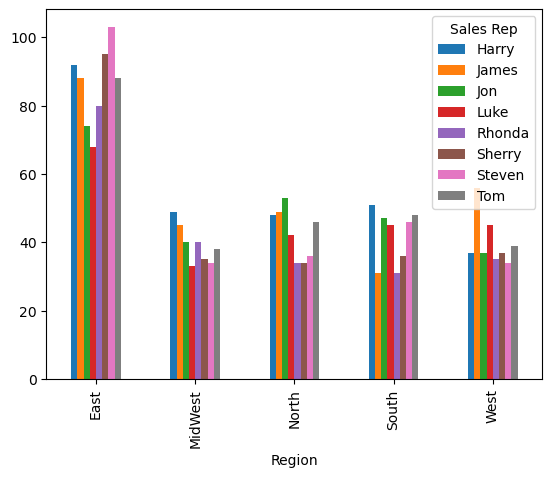

In [134]:
df.groupby(['Region','Sales Rep'])['sales_bin'].count().unstack().plot(kind = 'bar')

In [136]:
df.groupby(['Sales Rep','Region','sales_bin'], as_index = False)['sales_bin'].value_counts()

,Sales Rep,Region,sales_bin,count
0,Harry,East,1,21
1,Harry,East,2,26
2,Harry,East,3,16
3,Harry,East,4,29
4,Harry,MidWest,1,11
...,...,...,...,...
155,Tom,South,4,11
156,Tom,West,1,14
157,Tom,West,2,8
158,Tom,West,3,6
